## Estimate the eigenfrequency the SDOF problem by passage through the equilibrium point when dx0 =1 and x0 and f are 0

In [1]:
import sys
sys.path.append('../')


import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('classic')

from functions.BernsteinPols import BP, dBP
from functions.construct_B import construct_B
from functions.iteration import SDOF_integration
from functions.make_solution import get_displacement, get_speed, get_acceleration, get_solution

Define parameters for the SDOF system

In [2]:
m   = 1.5               # the mass, >0
c   = 0.1               # the damping coefficient, >= 0
k   = 2                 # the stiffness coefficient, >0
x0  = 0                 # the initial displacement
dx0 = 1                 # the initial speed
def force(t):           # the excitation function = 0 for this test
	return 0
    # return np.sin(t)

Define parameters for the approximation

In [3]:
p   = 5                    # p-1 is the degree of polynomial approximation, p>= 3
h   = 0.1                  # the timestep, >0
l   = 100                  # the number of iterations, >0
sampling_rate = 0.00001    # the spacing of points to sample for estimating the eigenfrequency

Initialize and run the algorithm

In [4]:
c = c/m
k = k/m
def f(t):
    return force(t)/m

sdof_int = SDOF_integration(p, c, k, x0, dx0, f, h, l)

BP_coefs = sdof_int.integrator()
t_series, approx_disp, approx_speed, _ = get_solution(BP_coefs, c, k, f, h, sampling_rate = sampling_rate)
approx_speed = approx_speed[:t_series.shape[0]]

Calculate and plot the approximate speed

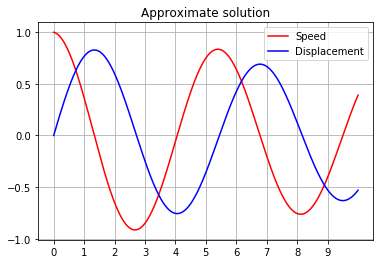

In [5]:
fig = plt.figure()
# ax = plt.axes()
ax = fig.gca()
ax.set_xticks(np.arange(-0, l*h, 1))
ax.set_yticks(np.arange(-1., 1.1, 0.5))
plt.title("Approximate solution")
ax.plot(t_series, approx_speed, 'red', label = 'Speed');
ax.plot(t_series, approx_disp, 'blue', label = 'Displacement');
ax.legend();
plt.grid()
plt.show()

Find changes of sign in speed

In [6]:
change_sign = list(map(lambda x:x[0]*x[1] <= 0,list(zip(approx_disp[:-1],approx_disp[1:]))))
idx = [sampling_rate*i for i,x in enumerate(change_sign) if x]
xi = c / (2*np.sqrt(k))
true_period = np.pi / (np.sqrt(k) * np.sqrt(1 - xi **2))
error = (idx[1:] - true_period*np.arange(1,len(idx)))/ true_period

for i in range(len(error)):
    print("The relative error in the estimation of the {i}-th half-eigenperiod is {e:.2e}".format(i = i+1, e = error[i]))

The relative error in the estimation of the 1-th half-eigenperiod is -1.24e-06
The relative error in the estimation of the 2-th half-eigenperiod is -2.48e-06
The relative error in the estimation of the 3-th half-eigenperiod is -3.73e-06
